# Proyecto Terminal (prototipo)
## Introducción:

Este análisis fue un prototipo para implementar la segmentación de documentos en la biblioteca de la Universidad del Caribe. El objetivo fue identificar temas relevantes en una colección de documentos y presentar los términos principales para cada tema en una nube de palabras. Para ello, se extrajeron artículos de la página International Journal of Machine Learning and Computing mediante web scraping y Python. A continuación, se preprocesaron los documentos, se caracterizó la colección utilizando la matriz tf-idf y se aplicó la técnica LDA para identificar temas relevantes.

Resultado:
El análisis permitió identificar temas relevantes y términos principales en la colección de documentos, lo que podría ayudar a mejorar los servicios de la biblioteca universitaria al identificar libros populares. A continuación se presenta el proceso y los resultados en detalle.

##Desarrollo:
###1. Obtención y conversión de documentos: Web Scraping y Linux.

El objetivo de esta parte del proyecto fue obtener los 375 documentos necesarios para su realización mediante web scraping y Python. Para ello, se desarrolló un script que descargaba los archivos desde una página web específica. Utilizamos la biblioteca urllib para abrir la página web y BeautifulSoup para analizar su contenido y extraer los enlaces a los documentos.

En el prototipo, se decidió que la base de datos de los documentos convertidos se almacenara en Google Drive. Sin embargo, es importante tener en cuenta que la ubicación de la base de datos dependerá de cómo se acceda y manipule.

Una vez descargados los archivos, se procedió a convertirlos a texto mediante un script en Linux. Para ello, se utilizó el comando "pdf2txt" disponible en el sistema operativo Ubuntu. La conversión a texto fue importante para poder analizar y procesar los documentos de manera más eficiente en las siguientes etapas del proyecto.

En resumen, esta parte del proyecto se centró en la obtención de los documentos necesarios mediante web scraping y la conversión de los mismos a texto mediante un script en Linux. Se descargaron y convirtieron en total 375 documentos, los cuales se almacenaron en una base de datos en Google Drive en el prototipo.

Adjunto Script:


```
import urllib.request
from bs4 import Beautifu1Soup
docs_web = urllib.request.urlopen( 'http://www.ijmlc.org/list-6-1.html').read().decode()
for i in range (7-100):
	soup = Beautifu1Soup(docs_web)
	tags = soup('qk-loop')
	for tag in tags:
		print(tag.get('href'))
```



####1.1 Montaje de la unidad de Google Drive en Google Colab.
En esta sección, se presenta el código necesario para montar una unidad de Google Drive en Google Colab. Esto es útil cuando se trabaja con conjuntos de datos grandes o cuando se desea guardar los resultados de un análisis en una ubicación segura y accesible en línea. Se utiliza la biblioteca de Google Colab para montar la unidad de Google Drive, lo que permite acceder a los archivos de Google Drive directamente desde el entorno de Google Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####1.2 Librerías y herramientas de procesamiento de texto utilizadas en el proyecto.
En esta sección, se presentan las librerías y herramientas utilizadas para el procesamiento de texto en el proyecto. Se utilizó la librería NumPy para realizar cálculos matemáticos, la librería Pandas para el manejo de datos, y la librería Sklearn para la extracción de características y clustering. Además, se utilizó la herramienta de visualización de nubes de palabras WordCloud y la librería Matplotlib para graficar resultados. La descripción detallada del uso de estas herramientas se encuentra en las secciones posteriores del proyecto.

In [2]:
import numpy as np
import pandas as pd
import os
import operator
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

####1.3 Obtención y Almacenamiento de los documentos en el proyecto.
En esta sección, se presenta el código utilizado para obtener los documentos descargados previamente y almacenados en Google Drive. Se utilizó la librería os para acceder al directorio de los archivos y listar los nombres de los mismos. Los nombres de los archivos se almacenaron en una lista denominada "file_names". La ruta del directorio utilizado en este proyecto es "/content/drive/MyDrive/DocsProyects/APtxt", aunque puede variar dependiendo de la ubicación de los documentos. Estos nombres de archivo se utilizaron posteriormente en el proceso de preprocesamiento y análisis de los documentos.

In [3]:
file_names = []
for i in os.listdir("/content/drive/MyDrive/DocsProyects/APtxt"):
  file_names.append(i)

Verificamos si obtuvimos correctamente todos los documentos del Google Drive

In [4]:
print(file_names)

['496-A48.txt', '478-L0048.txt', '477-W031.txt', '476-W011.txt', '474-W019.txt', '490-A42.txt', '485-W035.txt', '473-W048.txt', '488-A31.txt', '493-A47.txt', '479-W028.txt', '500-SE002.txt', '491-A28.txt', '499-A10.txt', '487-W014.txt', '484-W024.txt', '475-W006.txt', '494-A06.txt', '501-A39.txt', '481-L0046.txt', '497-SE004.txt', '495-A45.txt', '502-C007.txt', '483-W012.txt', '486-W044.txt', '498-A35.txt', '489-A16.txt', '482-W010.txt', '480-W050.txt', '492-A14.txt', '526-C029.txt', '536-X010.txt', '535-C037.txt', '522-C021.txt', '504-C0016.txt', '503-C0018.txt', '512-C3004.txt', '517-C002.txt', '523-C013.txt', '530-C2003.txt', '541-X007.txt', '524-C023.txt', '519-C024.txt', '538-C0020.txt', '544-C039.txt', '533-C035.txt', '506-C011.txt', '520-C025.txt', '537-N2004.txt', '529-C036.txt', '532-L0055.txt', '546-X016.txt', '516-C0004.txt', '542-C046.txt', '507-C0015.txt', '527-C054.txt', '531-C009.txt', '521-C016.txt', '505-C005.txt', '514-C3008.txt', '511-C1001.txt', '513-A44.txt', '515-

####1.4 Extracción de texto de los documentos
En esta sección, se presenta el código utilizado para extraer el texto de los documentos almacenados previamente en Google Drive. Se creó una función llamada "extract_files" que toma como entrada una lista de nombres de archivo y devuelve un diccionario donde las claves son los nombres de archivo sin extensión y los valores son el contenido de los documentos. Se utilizó la librería os para acceder al directorio de los archivos y la función open para leer el contenido de cada archivo. El texto extraído se almacenó en un diccionario denominado "dictionary", el cual se utilizó posteriormente en el proceso de preprocesamiento y análisis de los documentos.

In [5]:
def extract_files(files):
  collection = {}
  for i in files:
    f = open('/content/drive/MyDrive/DocsProyects/APtxt/' + i, 'r', encoding='utf-8')
    message = f.read()
    i = i.replace('.txt', '')
    collection[i] = message
    f.close()
  return collection

dictionary = extract_files(file_names)

### 2. Preprocesamiento de documentos con Python y Scikit-learn.
En esta sección del proyecto se realiza el preprocesamiento de los documentos para que puedan ser analizados y segmentados de manera más eficiente. El preprocesamiento consiste en varias etapas que se realizan en sucesión:

* Primero, se transforma todo el texto a minúsculas para evitar problemas con palabras en mayúsculas y minúsculas que puedan ser iguales pero no se consideran como tal por el modelo.

* Luego, se eliminan los signos de puntuación, ya que no aportan información útil y pueden dificultar el análisis de las palabras.

* A continuación, se eliminan los números, ya que tampoco aportan información útil en este análisis en particular.

* Finalmente, se eliminan las palabras vacías o "stop-words", que son palabras muy comunes que no aportan información útil para el análisis de texto. Ejemplos de stop-words en inglés son "the", "a", "an", "and", entre otras.

Este proceso de preprocesamiento es importante para eliminar información innecesaria y dejar solo las palabras relevantes para el análisis de los documentos.

####2.1 Bolsa de palabras (bag of words)
En esta sección se presenta la función "bag_of_words", la cual se encarga de procesar los documentos de la colección y transformarlos en una bolsa de palabras. Además, se muestra cómo se aplica esta función al diccionario de documentos previamente creado mediante la función "extract_files". Este proceso de preprocesamiento de los documentos es necesario para poder aplicar técnicas de minería de textos y análisis de datos en la siguiente etapa del proyecto.

In [6]:
def bag_of_words(d):
    # removemos los signos de puntuación
    sigs = [',','.',':',';']
    dc = d
    for s in sigs:
        dc = dc.replace(s, '')

    # dividimos las palabras por medio de los espacios y las convertimos a minúsculas
    sp = dc.split(" ")
    bw = set(sp)
    bw = [w.lower() for w in bw]
    return bw
 
# Aplicamos bag_of_words al diccionario
processed_docs = [bag_of_words(doc) for doc in dictionary.values()]
processed_docs = [' '.join(doc) for doc in processed_docs]

####2.2 Vectorización de los documentos mediante TF-IDF y creación de un dataframe.
En esta sección se utiliza el objeto TfidfVectorizer de la biblioteca scikit-learn para convertir los documentos preprocesados en una matriz de término-frecuencia inversa de documentos de frecuencia (TF-IDF). Este proceso asigna un peso a cada palabra en cada documento, teniendo en cuenta la frecuencia de la palabra en el documento y en la colección de documentos. Además, se convierten los resultados de la transformación en un dataframe de pandas.

In [7]:
# Creamos una instancia de TfidfVectorizer con ciertas configuraciones parámetros específicos para el preprocesamiento y la vectorización
# stop_words para eliminar palabras vacías comunes
# lowercase para convertir todo el texto a minúsculas
# min_df para indicar el número mínimo de documentos en los que una palabra debe aparecer para ser incluida en el análisis.
vectorizer = TfidfVectorizer(stop_words ='english',lowercase = True,token_pattern=r'\b[a-zA-Z]{3,}\b', analyzer= 'word',min_df=10)

# Aplicamos el método fit_transform al vectorizador para obtener la matriz TF-IDF
vectors = vectorizer.fit_transform(processed_docs)

# Obtenemos los nombres de las características (palabras)
feature_names = list(vectorizer.vocabulary_.keys())

# Convertimos la matriz sparse a una matriz densa
dense = vectors.toarray()

# Creamos un DataFrame de Pandas con la matriz densa y los nombres de las características
df = pd.DataFrame(dense, columns=feature_names)

In [8]:
df

,consumer,smaller,seoul,assigned,log,methods,server,client,personalized,office,...,comprise,alexnet,mohamed,lai,abdullah,pipeline,mtech,lstm,mohammed,cham
0,0.0,0.0,0.0,0.0,0.040879,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.046903,0.00000,0.000000,0.000000,0.000000,0.029122,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.115638,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.024729,0.00000,0.000000,0.000000,0.000000,0.030708,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.027258,0.00000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.018806,0.017824,0.000000,0.00000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
371,0.0,0.0,0.0,0.0,0.000000,0.034262,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
372,0.0,0.0,0.0,0.0,0.000000,0.012502,0.011849,0.000000,0.02883,0.0,...,0.0,0.000000,0.01347,0.020066,0.025062,0.026681,0.000000,0.019547,0.0,0.0
373,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.021821,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [9]:
df_v = df.copy()
df_v.insert(0, "Nombre del documento", file_names)
df_v

,Nombre del documento,consumer,smaller,seoul,assigned,log,methods,server,client,personalized,...,comprise,alexnet,mohamed,lai,abdullah,pipeline,mtech,lstm,mohammed,cham
0,496-A48.txt,0.0,0.0,0.0,0.0,0.040879,0.000000,0.000000,0.000000,0.00000,...,0.0,0.046903,0.00000,0.000000,0.000000,0.000000,0.029122,0.000000,0.0,0.0
1,478-L0048.txt,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.115638,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,477-W031.txt,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.024729,0.00000,0.000000,0.000000,0.000000,0.030708,0.000000,0.0,0.0
3,476-W011.txt,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.027258,0.00000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,474-W019.txt,0.0,0.0,0.0,0.0,0.000000,0.018806,0.017824,0.000000,0.00000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,837-IT024.txt,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
371,842-IT022.txt,0.0,0.0,0.0,0.0,0.000000,0.034262,0.000000,0.000000,0.00000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
372,863-L0312.txt,0.0,0.0,0.0,0.0,0.000000,0.012502,0.011849,0.000000,0.02883,...,0.0,0.000000,0.01347,0.020066,0.025062,0.026681,0.000000,0.019547,0.0,0.0
373,860-ML0049.txt,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.021821,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


Como podemos ver anteriormente, la salida de esta fase es un dataframe que guarda una matriz de características (o features), que representa cada documento como un conjunto de características ponderadas. En otras palabras, cada fila de la matriz representa un documento, y cada columna representa una característica (por ejemplo, una palabra). El valor de cada celda en la matriz indica la importancia relativa de esa característica para el documento correspondiente, según el esquema de ponderación TF-IDF.

La matriz de características se puede utilizar como entrada para muchos modelos de aprendizaje automático, como clasificadores, agrupadores, etc. Estos modelos pueden utilizar la información contenida en la matriz para realizar tareas como clasificación de documentos, agrupación de documentos similares, extracción de temas, entre otras. Además, la matriz también se puede visualizar y analizar utilizando técnicas como la reducción de dimensionalidad y la visualización de datos, lo que puede proporcionar información valiosa sobre los patrones y estructuras en los datos.

### 3. Generación de nube de palabras
En esta fase se utiliza la biblioteca WordCloud para generar una nube de palabras que permita identificar visualmente los términos más frecuentes en los artículos. Primero, se convierte el conjunto de documentos preprocesados en un solo texto separado por espacios en blanco. Luego, se utiliza la función WordCloud para generar la nube de palabras, en la que se asigna un tamaño proporcional a la frecuencia de cada término. Se pueden ajustar los parámetros para el tamaño de la imagen, el número máximo de palabras que se muestran y la paleta de colores utilizada. La nube de palabras resultante proporciona una visión general de los temas y conceptos principales que se discuten en los documentos.

####3.1 Cálculo de frecuencias de términos en los documentos.
En esta fase, se calculan las frecuencias de términos en los documentos procesados anteriormente. Primero, se crea un diccionario de frecuencias de términos utilizando la función dict() y la función zip() para unir los nombres de los términos y sus frecuencias. Luego, se utiliza la función sum() y tolist() de la biblioteca NumPy para sumar las frecuencias de cada término en todos los documentos y convertir la matriz resultante a una lista. Finalmente, se utiliza el método tolist() de la lista para convertir la lista de frecuencias en un diccionario de Python.

In [10]:
# Creamos un diccionario con las frecuencias de cada término
# feature_names contiene una lista con los términos extraídos de los documentos procesados
# vectors.sum(axis=0) suma las frecuencias de cada término en todos los documentos
# tolist() convierte el resultado a una lista de una dimensión
# [0] accede a la lista obtenida anteriormente
# zip une los términos y sus frecuencias en un objeto iterable (tuplas)
# dict crea un diccionario a partir del objeto iterable generado por zip
term_frequencies = dict(zip(feature_names, vectors.sum(axis=0).tolist()[0]))

####3.2 Generación y visualización de nube de palabras
En esta fase se utiliza la librería WordCloud para generar una nube de palabras con los términos más frecuentes en los artículos. Para esto, se utiliza el diccionario de términos y frecuencias obtenido en la fase anterior. Luego, se crea una instancia de WordCloud con las características deseadas y se genera la nube de palabras a partir de las frecuencias de términos. Finalmente, se muestra la nube de palabras en una figura utilizando matplotlib.

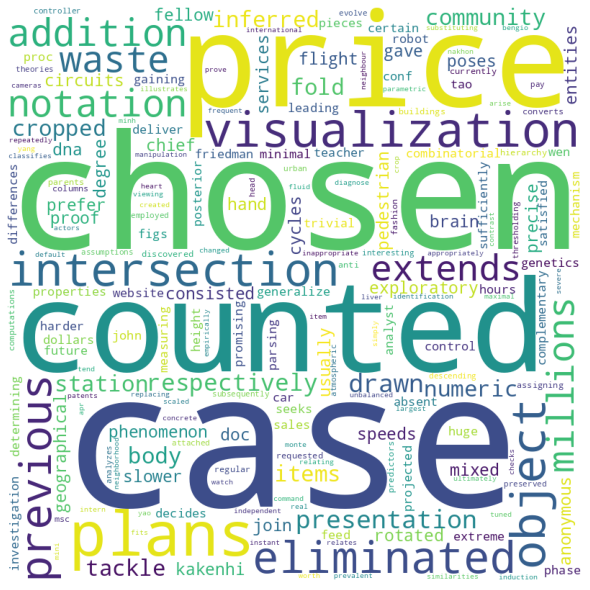

In [11]:
# Creamos la nube de palabras
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10)
wordcloud.generate_from_frequencies(term_frequencies)

# Mostramos la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

La salida de esta fase es una imagen que muestra una nube de palabras, donde el tamaño de cada palabra representa su frecuencia en los documentos analizados. En la imagen, las palabras más frecuentes aparecen con un tamaño mayor, mientras que las menos frecuentes aparecen con un tamaño menor. Esta visualización permite identificar fácilmente los términos más relevantes y frecuentes en los documentos analizados, lo que puede ser útil para entender el contenido general de los mismos y extraer información relevante de manera rápida y eficiente.

####3.3 Creación de una nube de palabras para los términos más frecuentes
En esta sección, se utiliza la librería "operator" para ordenar los términos de mayor a menor frecuencia. Se seleccionan los 5 términos más frecuentes y se crea un diccionario con ellos. Este diccionario se utiliza para generar una nueva nube de palabras utilizando la misma técnica anterior.

La diferencia es que esta vez la nube de palabras sólo muestra los 5 términos más frecuentes, en lugar de mostrar todos los términos. La salida es una nube de palabras que resalta los términos más importantes y frecuentes en los artículos.

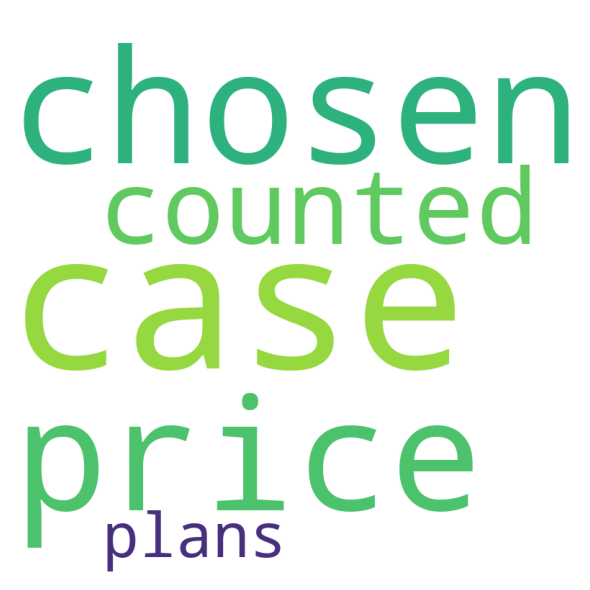

In [12]:
sorted_terms = sorted(term_frequencies.items(), key=operator.itemgetter(1), reverse=True)[:5]
word_dict = dict(sorted_terms)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10)
wordcloud.generate_from_frequencies(word_dict)
# Mostramos la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Podemos inferir que los términos "chosen", "counted", "case", "price" y "plans" son relevantes y frecuentes en los artículos del International Journal of Machine Learning and Computing. 

- "Chosen" y "counted" podrían estar relacionados con el análisis de datos y la selección de variables. 

- "Case" podría referirse a la metodología de estudios de casos en el aprendizaje automático. 

- "Price" podría estar relacionado con el análisis de precios.

- "plans" podría estar relacionado con la planificación de proyectos. 

En general, estos términos sugieren que el International Journal of Machine Learning and Computing se centra en el análisis de datos, la metodología de estudios de casos, la planificación de proyectos y el análisis de precios.

### 4. Aplicación del algoritmo k-medias para agrupar los documentos.
En esta fase, se aplicará el algoritmo de k-medias para agrupar los documentos. El objetivo de este algoritmo es dividir un conjunto de puntos en k grupos, de manera que los puntos dentro de cada grupo sean similares entre sí y diferentes a los de otros grupos.

Para definir el número de grupos k, se utilizará una estrategia adecuada. Una forma común de hacerlo es mediante la técnica del codo (elbow method), que consiste en graficar el número de grupos (k) en el eje x y la suma de las distancias al cuadrado de los puntos más cercanos al centroide de cada grupo en el eje y. Luego se busca el punto en el que la curva comienza a aplanarse, que indica el número óptimo de grupos.

Una vez definido el número de grupos, se aplicará el algoritmo de k-medias usando la implementación de la librería Scikit-learn de Python. El resultado será una lista que indica a qué grupo pertenece cada documento.

####4.1 Método Elbow para determinar el número óptimo de clusters en K-Means.
En esta sección se busca aplicar el método Elbow para determinar el número óptimo de clusters en el algoritmo K-Means. Primero, se define un rango de valores de k (número de clusters) para evaluar. Luego, se inicializa una lista para almacenar las sumas de las distancias al cuadrado para cada k-value. Se ajusta el modelo K-Means para cada k-value y se guarda la suma de distancias al cuadrado en la lista. Finalmente, se grafica la curva Elbow, que muestra la relación entre la cantidad de clusters y la suma de distancias al cuadrado, para ayudar a identificar el número óptimo de clusters. El número óptimo de clusters suele ser el valor de k en el cual la suma de distancias al cuadrado comienza a disminuir de manera más lenta (aparece un codo en la curva).

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


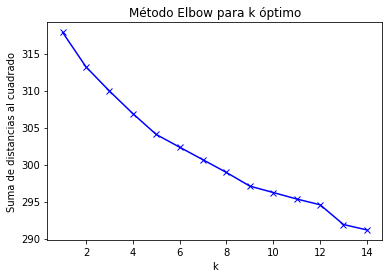

In [13]:
# Definir un rango de k-values
K = range(1, 15)

# Inicializar una lista para almacenar las sumas de distancias al cuadrado
sum_of_squared_distances = []

# Calcular las sumas de distancias al cuadrado para cada k-value
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(vectors)
    sum_of_squared_distances.append(km.inertia_)

# Graficar la curva "elbow"
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma de distancias al cuadrado')
plt.title('Método Elbow para k óptimo')
plt.show()

El código anterior muestra un gráfico conocido como la curva "elbow" o codo, la cual se utiliza para determinar el número óptimo de clusters (grupos) a utilizar en el algoritmo de k-medias. En el eje x se encuentra el número de clusters k y en el eje y se encuentra la suma de las distancias al cuadrado entre los puntos y su centroide correspondiente para cada cluster.

La estrategia utilizada consiste en probar diferentes valores de k y calcular la suma de distancias al cuadrado para cada uno de ellos. Posteriormente, se grafican estos valores y se busca el punto en el que la curva comienza a aplanarse o formar un codo, lo cual indica que a partir de ese punto no se estaría obteniendo una mejora significativa en la calidad de los clusters.

En la salida anterior, se puede observar que la curva comienza a aplanarse a partir de k=4 y que el valor más alto de la suma de distancias al cuadrado se encuentra en el rango de 290 a 315. Esto sugiere que un valor de k entre 4 y 6 podría ser una buena opción para el algoritmo de k-medias en este caso.

####4.2 Aplicación del algoritmo k-medias para agrupar documentos.
En este fragmento de código, se aplica el algoritmo k-medias para agrupar los documentos. Primero se define el número de grupos (k) en 6 y se inicializa el modelo de k-medias con la función KMeans(). Luego se ajusta el modelo a los datos utilizando la función fit().

Después se ordenan los centroides de cada grupo por orden descendente y se obtienen los términos principales por grupo. Finalmente, se almacenan los términos en un diccionario por cluster y se crea un DataFrame para cada uno.

In [14]:
# Definimos el número de grupos
k = 6

# Inicializamos el modelo de k-medias
model = KMeans(n_clusters=k, init='k-means++', max_iter=100)

# Ajustamos el modelo a los datos
model.fit(df)

# Imprimimos los términos principales por grupo
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = list(vectorizer.vocabulary_.keys())

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


####4.3 Organización de términos principales por cluster.
Este código crea un diccionario llamado "clusters" para almacenar los términos por cluster, donde "k" es el número de grupos definidos previamente. Luego, para cada cluster, se agregan los 10 términos principales a través de un bucle for que recorre la matriz de índices "order_centroids", que contiene los índices de los términos más relevantes para cada cluster. Los términos se agregan al diccionario "clusters" para cada cluster correspondiente.

A continuación, se crea un DataFrame para cada cluster usando los términos almacenados en el diccionario. Luego, se agregan estos DataFrames a una lista llamada "dfs". Finalmente, los DataFrames de la lista se unen en uno solo llamado "df_clusters" usando la función "pd.concat". Esto da como resultado un DataFrame que contiene los términos principales para cada cluster.

El objetivo de este código es organizar los términos más relevantes en grupos específicos para identificar patrones y temas comunes en los documentos.

In [15]:
# Creamos un diccionario para almacenar los términos por cluster
clusters = {i: [] for i in range(k)}

# Agregamos los términos a cada cluster
for i in range(k):
    for ind in order_centroids[i, :10]:
        clusters[i].append(terms[ind])

# Creamos un DataFrame para cada cluster
dfs = []
for i in range(k):
    df_cluster = pd.DataFrame({'Cluster %d' % i: clusters[i]})
    dfs.append(df_cluster)

# Unimos todos los DataFrames en uno solo
df_clusters = pd.concat(dfs, axis=1)

In [16]:
df_clusters

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,case,case,chosen,case,teacher,phase
1,mao,body,previous,real,object,properties
2,proof,station,case,proof,case,case
3,preserved,investigation,flight,establishment,disjoint,price
4,fits,numeric,counted,eliminated,contact,differently
5,abs,kakenhi,price,john,indexing,station
6,chosen,dictionary,usually,chosen,eliminated,join
7,ith,precise,brain,consistency,dissertation,prefer
8,grown,visualization,community,release,degree,geographical
9,price,declare,urban,intersection,garcia,tackle


La salida es una tabla que muestra los términos principales por cada uno de los 6 clusters generados a través del algoritmo de k-medias. Cada cluster tiene un número asociado (Cluster 0, Cluster 1, etc.) y una lista de 10 términos que lo definen. Estos términos se seleccionan a partir de los centroides de cada cluster, que son los puntos centrales de cada grupo de puntos. En este caso, se seleccionan los 10 términos más cercanos a cada centroide y se agregan a la lista de términos del cluster correspondiente. Esta tabla puede ser útil para entender las características de cada cluster y para etiquetarlos en consecuencia.

####4.4 Identificación de palabras repetidas en los clusters
En este bloque de código se transpone el DataFrame de clusters para que las palabras estén como índices. Luego se cuenta cuántas veces aparece cada palabra en los clusters y se filtra por aquellas que aparecen en más de un cluster. Finalmente, se imprime la lista de palabras repetidas. Esto es útil para identificar aquellas palabras que pueden estar generando confusión en la clasificación de los documentos y que podrían ser eliminadas o tratadas de manera especial.

In [18]:
# Transponemos el DataFrame para tener las palabras como índices
df_clusters_transposed = df_clusters.T

# Obtenemos la cuenta de cuántas veces aparece cada palabra en los clusters
word_counts = df_clusters_transposed.stack().value_counts()

# Filtramos por aquellas palabras que aparecen en más de un cluster
repeated_words = word_counts[word_counts > 1]

print(repeated_words)

case          6
chosen        3
price         3
proof         2
eliminated    2
station       2
dtype: int64


El resultado es una serie de Pandas que muestra la cuenta de cuántas veces aparece cada palabra en los clusters. La serie está ordenada en orden descendente de frecuencia de palabras. Se puede observar que la palabra "case" aparece en 6 de los 6 clusters, "chosen" aparece en 3 clusters, "price" aparece en 3 clusters, "proof" aparece en 2 clusters, "eliminated" aparece en 2 clusters y "station" aparece en 2 clusters.

Esta información puede ser útil para entender las palabras que son comunes en múltiples clusters y para encontrar patrones y temas comunes en los datos. En este caso, se puede observar que "case" es la palabra más común en todos los clusters, lo que sugiere que puede ser un término importante en la descripción de los documentos en el corpus utilizado para entrenar el modelo.

#Conclusion:

Este proyecto buscó agrupar documentos relacionados utilizando técnicas de aprendizaje no supervisado, específicamente un modelo de k-medias. Esta práctica resultó efectiva para el análisis de grandes cantidades de datos de texto, permitiendo identificar patrones de similitud y tendencias en el contenido.

En el estudio se utilizó esta técnica para analizar artículos científicos de diferentes disciplinas, obteniendo clusters temáticos bien definidos y con términos relevantes para cada uno de ellos. La capacidad de identificar patrones y temas comunes dentro de grandes conjuntos de datos de texto puede ser de gran utilidad en diferentes campos, como la industria de la tecnología, la investigación científica y la atención médica, entre otros.

La implementación de técnicas de procesamiento de lenguaje natural y agrupamiento también puede ayudar a automatizar la clasificación y etiquetado de grandes cantidades de datos de texto, lo que puede ahorrar tiempo y recursos. En conclusión, el proyecto demuestra que la aplicación de técnicas de procesamiento de lenguaje natural y agrupamiento mediante k-medias es una práctica efectiva para analizar grandes cantidades de datos de texto y puede tener aplicaciones valiosas en diversos campos.